In [0]:
import os ,sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

#cv2 없을시 설치 명령어 : pip install opencv-python
#matplotlib 없을시 설치 명령어 : pip install matplotlib

In [0]:
# 경로에 한글이 있으면 안됨
src = '/content/wheel_reference/'
# dst 폴더를 하나 만듬(바이너리 이미지 저장용)
dst ='/content/wheel_binary/'

# STEP1 : 1차 바이너리 변환

In [0]:
def to_binary(n):
  n=n
  th = 160
  file = os.listdir(src)
  org = cv2.imread(src+file[n],cv2.IMREAD_GRAYSCALE)

  #흰 바탕일때
  ret, th1 = cv2.threshold(org,th,255,cv2.THRESH_BINARY)

  #검정 바탕일때
  ret, th2 = cv2.threshold(org,th,255,cv2.THRESH_BINARY_INV)

  fig = plt.figure()
  ax1 = fig.add_subplot(131)
  ax1.title.set_text('original')
  ax1.imshow(org,'gray')

  ax2 = fig.add_subplot(132)
  ax2.title.set_text('binary : 1')
  ax2 .imshow(th1,'gray')

  ax2 = fig.add_subplot(133)
  ax2.title.set_text('binary_inv : 2')
  ax2 .imshow(th2,'gray')
              
  plt.show()
  th_ = input("select 1 or 2 : ")
  if th_ == '2':
    cv2.imwrite(dst+file[n].split('.')[0]+'.png', th2)
  elif th_ == '1':
    cv2.imwrite(dst+file[n].split('.')[0]+'.png', th1)

  return n


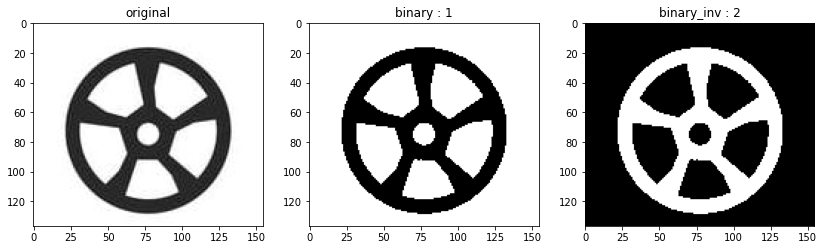

select 1 or 2 : 1


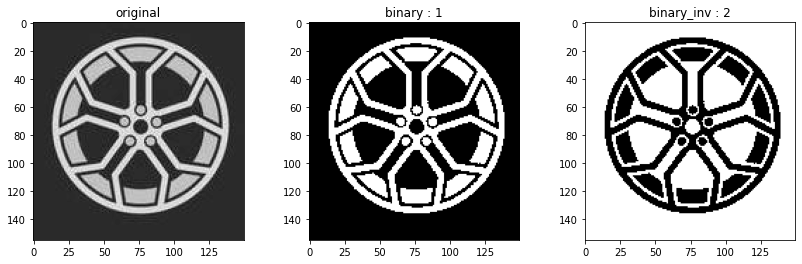

select 1 or 2 : 2


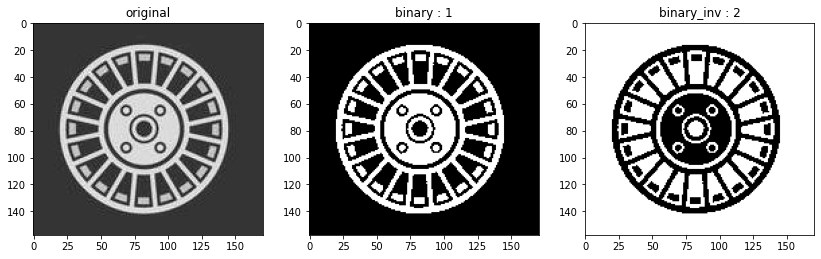

select 1 or 2 : 2


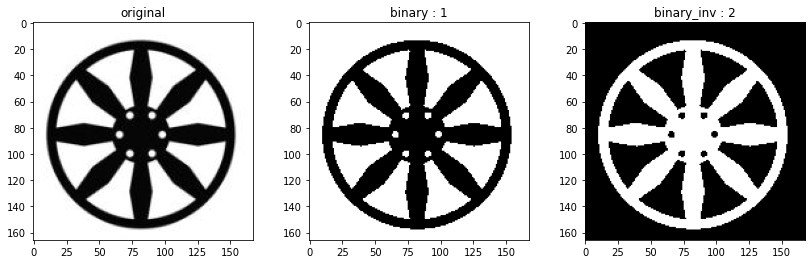

select 1 or 2 : 1


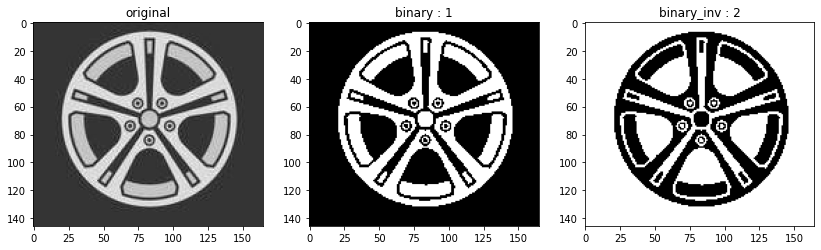

select 1 or 2 : 2


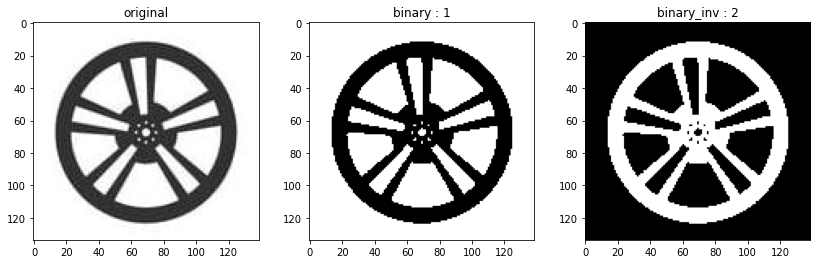

select 1 or 2 : 1


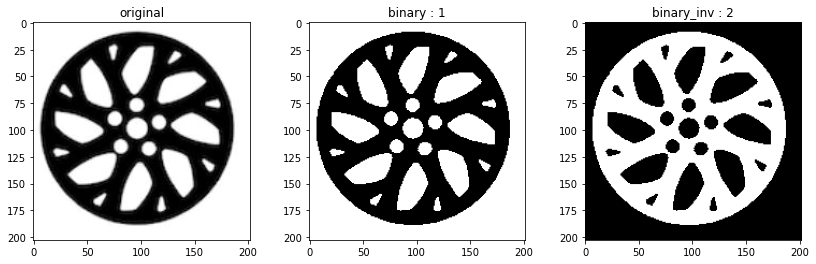

select 1 or 2 : 1


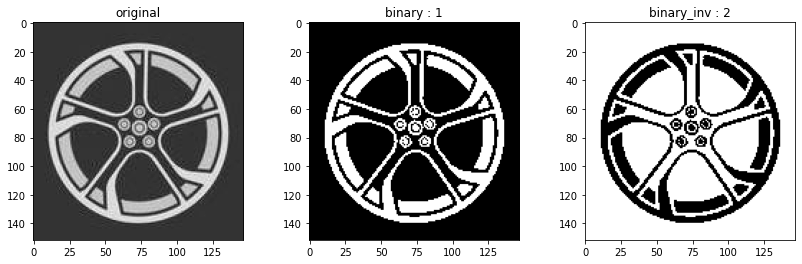

select 1 or 2 : 2


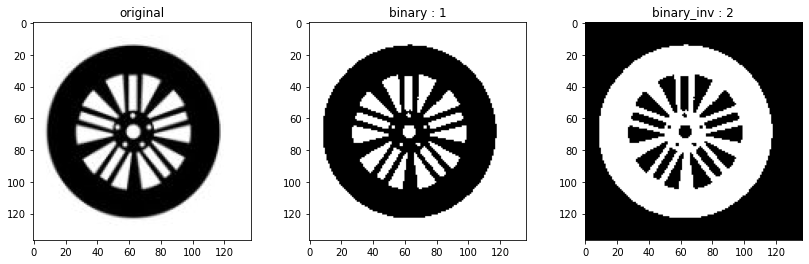

select 1 or 2 : 1


In [126]:
for n in range(len(os.listdir(src))):
  to_binary(n)

# STEP2 : 2차 바이너리 변환

97.png


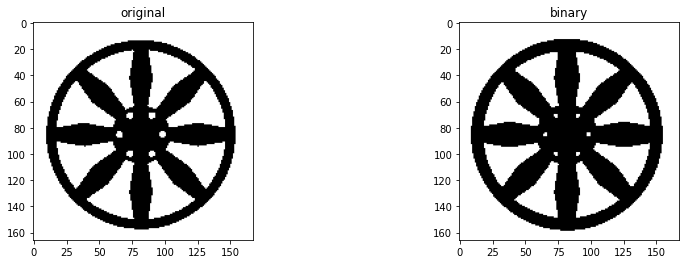

95.png


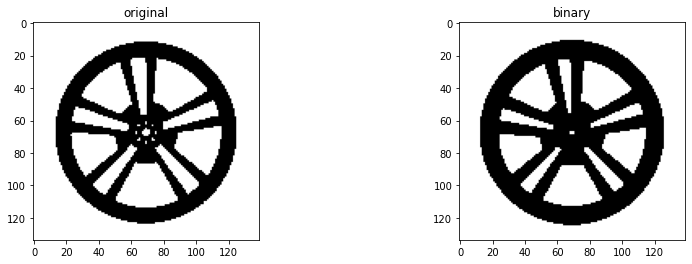

99.png


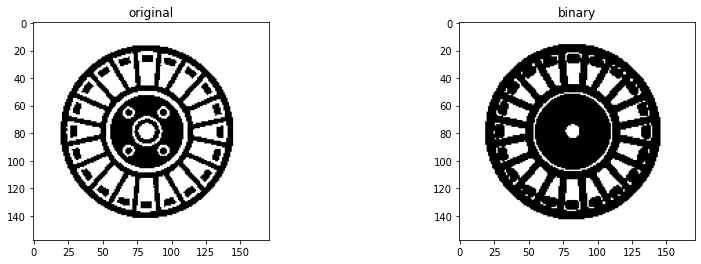

102.png


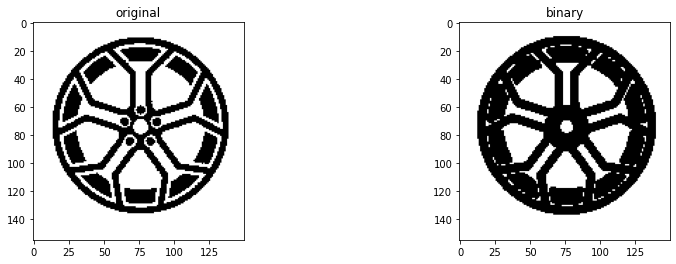

98.png


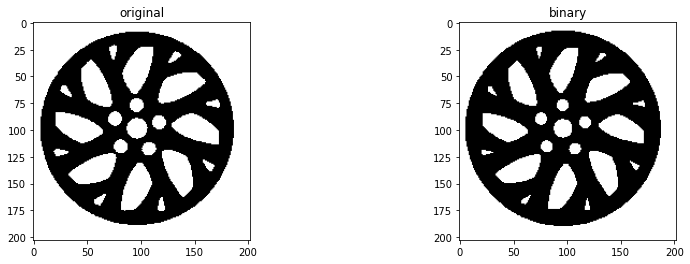

96.png


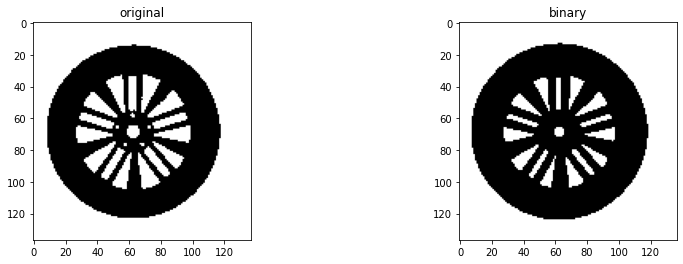

101.png


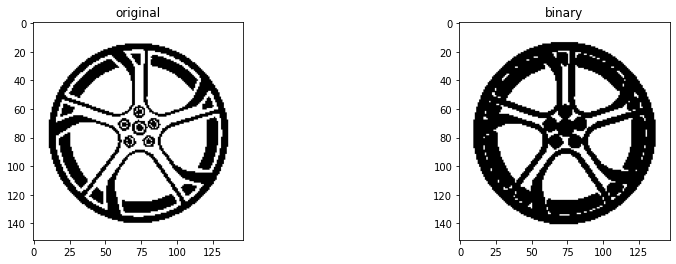

.png


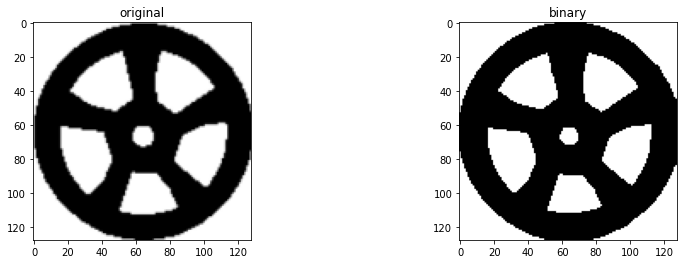

94.png


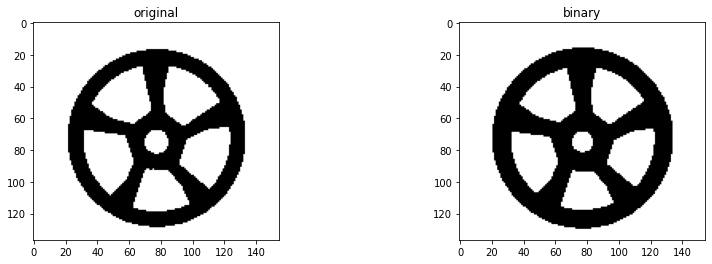

100.png


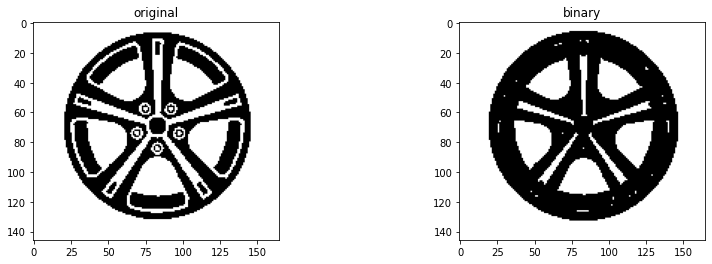

In [127]:
src = dst
file = os.listdir(src)
for file in os.listdir(src):
  if file[-4:] == '.png':
    org = cv2.imread(src+file)
    print(file)
    #흰 바탕일때
    th1 = cv2.bilateralFilter(org,-1,0.3,5)
    th1 = cv2.GaussianBlur(th1,(3,3),5)
    ret, th1 = cv2.threshold(th1,200,255,cv2.THRESH_BINARY)

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('original')
    ax1.imshow(org,'gray')

    ax2 = fig.add_subplot(122)
    ax2.title.set_text('binary')
    ax2 .imshow(th1,'gray')

    plt.show()
    cv2.imwrite(dst+file,th1)

# STEP3 : 이미지 여백자르기

97.png


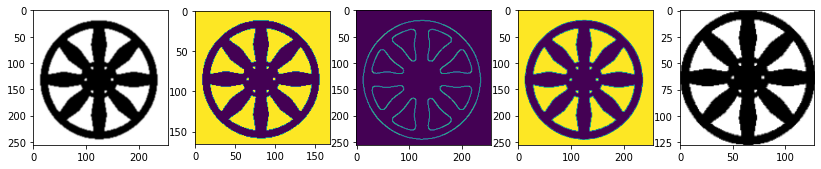

95.png


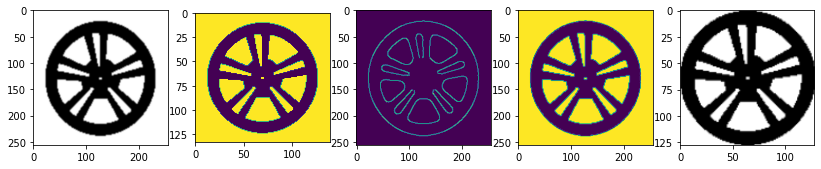

99.png


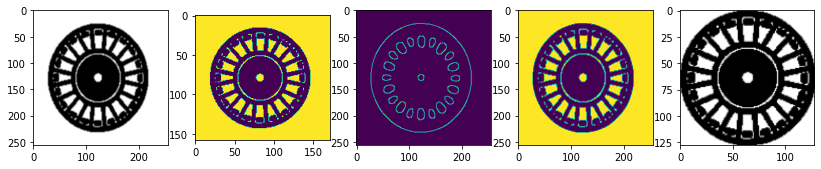

102.png


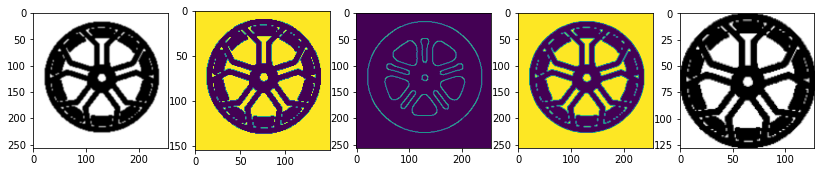

98.png


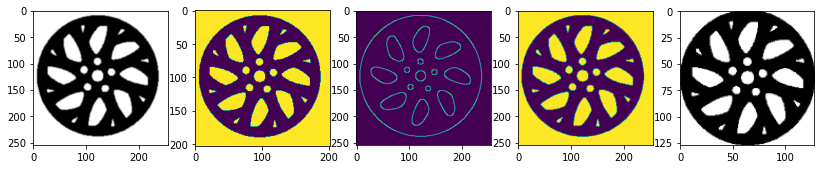

96.png


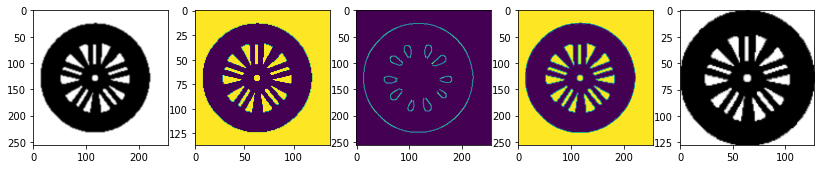

101.png


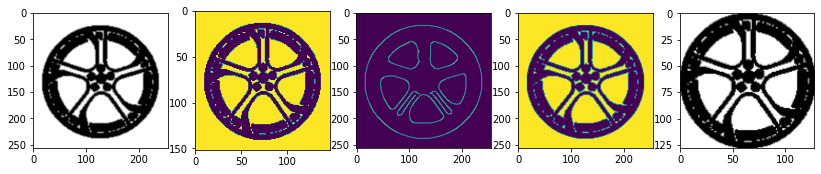

.png


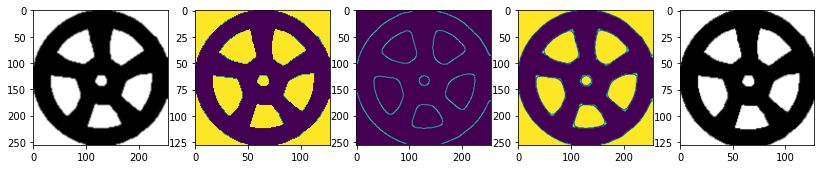

94.png


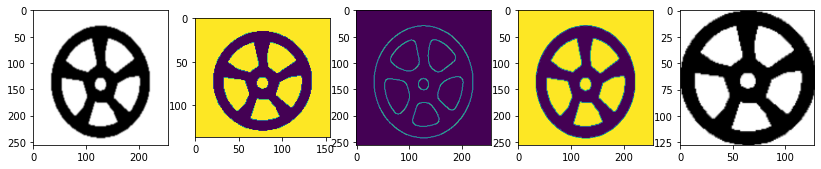

100.png


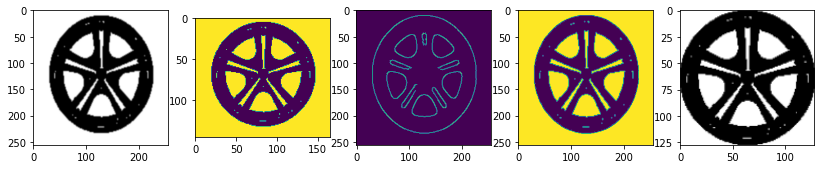

In [128]:
plt.rcParams["figure.figsize"] = (14,4)
for filename in os.listdir(src):
  if filename[-4:] == '.png':
      print(filename)
      fig = plt.figure()
      ax1 = fig.add_subplot(151)
      ax2 = fig.add_subplot(152)
      ax3 = fig.add_subplot(153)
      ax4 = fig.add_subplot(154)
      ax5 = fig.add_subplot(155)
      
      org = cv2.imread(src+filename)
      org1 = cv2.resize(org,(256,256))
      org = cv2.medianBlur(org1,13)
      org = cv2.bilateralFilter(org1,-1,0.3,5)
      org = cv2.GaussianBlur(org1,(3,3),0)
      #ret,org = cv2.threshold(org,200,255,cv2.THRESH_BINARY)
      
      ax1.imshow(org)

      image_gray = cv2.imread(src+filename, cv2.IMREAD_GRAYSCALE)

      ax2.imshow(image_gray)
      
      image = cv2.resize(image_gray,(256,256))
      blur = cv2.medianBlur(image,13)
      blur = cv2.GaussianBlur(blur,(13,13),0)
      blur = cv2.GaussianBlur(blur,(13,13),0)
      edged = cv2.Canny(blur, 4, 250)

      ax3.imshow(edged)

      contours, _ = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      total = 0

      # 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
      # 초록색 선 생김
      contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 1)

      ax4.imshow(contours_image)

      contours_xy = np.array(contours)
      contours_xy.shape
      x_min, x_max = 0,0
      value = []
      for i in range(len(contours_xy)):
          for j in range(len(contours_xy[i])):
              value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
              x_min = min(value)
              x_max = max(value)

      # y의 min과 max 찾기
      y_min, y_max = 0,0
      value = []
      for i in range(len(contours_xy)):
          for j in range(len(contours_xy[i])):
              value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
              y_min = min(value)
              y_max = max(value)
      
      x = x_min
      y = y_min
      w = x_max-x_min
      h = y_max-y_min

      img_trim = org1[y:y+h, x:x+w]
      img_trim = cv2.resize(img_trim,(128,128))
      
      ax5.imshow(img_trim)
      plt.show()
      
      cv2.imwrite(dst+filename,img_trim)

# STEP4 : 메뉴얼 수정(그림판으로 하기)
메뉴얼로 수정할때 휠의 허브 부분(가운데 원형으로 뚫린곳),볼트 구멍지우기